In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%2.2f' % float(height),
                ha='center', va='bottom')

Simple Plots in Python

In this tutorial we'll show you some basic templates of scientific plots using Python matplotlib.

# Bar graphs with standard error bars for 1 group

    gender    scores
0      1.0  0.612318
1      1.0  0.217740
2      1.0  0.697178
3      1.0  0.800421
4      1.0  0.512660
5      1.0  0.211649
6      1.0  0.996258
7      1.0  0.434187
8      1.0  0.589177
9      1.0  0.377102
10     0.0  1.863534
11     0.0  1.132871
12     0.0  1.612537
13     0.0  1.446522
14     0.0  1.735552
15     0.0  1.800160
16     0.0  1.780915
17     0.0  1.612132
18     0.0  1.204805
19     0.0  1.415219


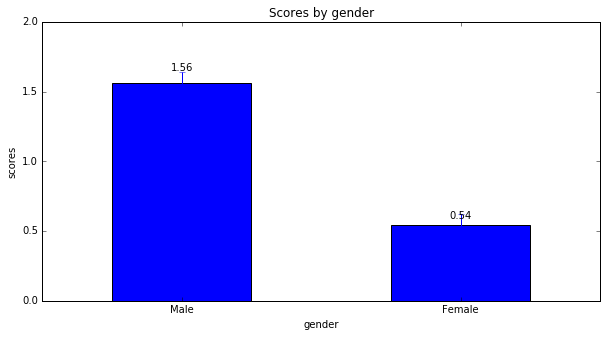

In [15]:
# based on http://matplotlib.org/examples/api/barchart_demo.html

# Make some fake data
d = {'gender': np.hstack([np.ones(10), np.zeros(10)]), 'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)
print df
# Get means for each group
means = df[['gender','scores']].groupby(['gender']).mean().squeeze()
# Get standard error of means for each group
sems = df[['gender','scores']].groupby(['gender']).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.array([0.,1.]) # location of bars
width = .5 # Width of bars
# (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error)
rects1 = ax.bar(ind - width/2,means,width=.5,color='blue',yerr=sems) 

# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.set_ylim([0,2])

autolabel(rects1)

plt.show()

# Bar graphs with standard error bars for 2 group

    gender  race    scores
0      1.0   0.0  0.794679
1      1.0   0.0  0.796167
2      1.0   0.0  0.417671
3      1.0   1.0  0.687146
4      1.0   1.0  0.124675
5      1.0   1.0  0.130264
6      1.0   1.0  0.288716
7      1.0   1.0  0.912089
8      1.0   1.0  0.202408
9      1.0   0.0  0.256710
10     0.0   0.0  1.109480
11     0.0   1.0  1.190513
12     0.0   1.0  1.454644
13     0.0   0.0  1.004136
14     0.0   0.0  1.629933
15     0.0   1.0  1.720945
16     0.0   0.0  1.632386
17     0.0   0.0  1.023691
18     0.0   1.0  1.695903
19     0.0   0.0  1.009198


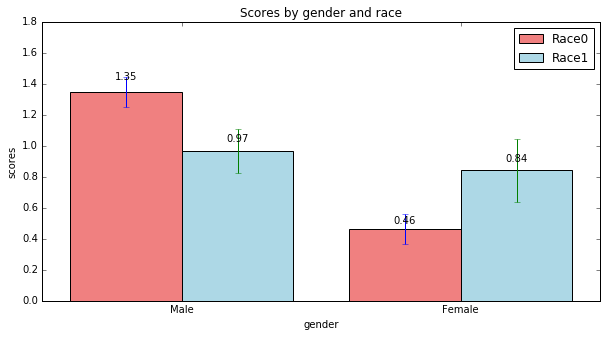

In [4]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(10), np.zeros(10)])), 
     'gender': np.hstack([np.ones(10), np.zeros(10)]), 
     'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)
print df

# Get means and sems for Gender group
means1 = df[['gender','scores']].groupby(['gender']).mean().squeeze()
sems1 = df[['gender','scores']].groupby(['gender']).sem().squeeze()
# Get means and sems for Race group
means2 = df[['race','scores']].groupby(['race']).mean().squeeze()
sems2 = df[['race','scores']].groupby(['race']).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.array([0.,1.]) # location of bars
width = .4 # Width of bars

# plot score by gender
rects1 = ax.bar(ind - width,means1,width,color='lightcoral',yerr=sems1) # (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error)
# plot score by race 
rects2 = ax.bar(ind,means2,width,color='lightblue',yerr=sems2)


# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender and race')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([ind[0]-width*1.25,ind[-1]+width*1.25]) 
ax.set_ylim([0,1.8])

ax.legend(['Race0','Race1'])

autolabel(rects1)
autolabel(rects2)


# Scatterplots of 1 group with jittered location

If you try to plot something like a scaled data, you won't be able to see how clustered they are because they would just plot on top of each other. One way to avoid this is to jitter the x,y locations around the actual value.

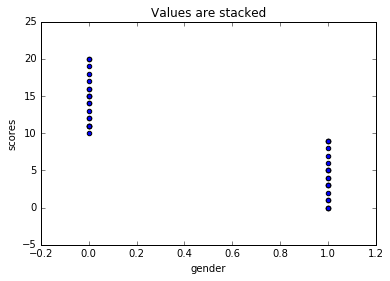

In [16]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(20), np.zeros(20)])),
     'gender': np.hstack([np.ones(20), np.zeros(20)]), 
     'scores': np.round(10*np.hstack([np.random.rand(20), np.random.rand(20)+1]))}
df = pd.DataFrame(d)
ax = df.plot(kind='scatter',x='gender',y='scores')
ax.set_title('Values are stacked')
plt.show()

Here is the fix. 

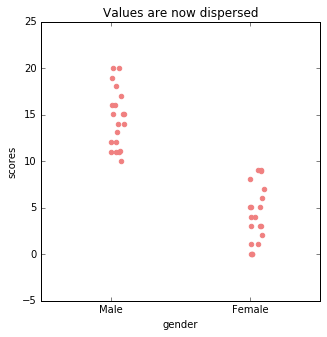

In [17]:
# Set x,y values for each group
gender0 = 0 # value of first group
y0 = df[['scores']].loc[df['gender']==gender0].values.squeeze()
y0 = y0+np.random.rand(len(y0))*.1 #Change after + sign to control dispersion
x0 = np.ones(len(y0))*gender0 +np.random.rand(len(y0))*.1 #Change after + sign to control dispersion

gender1 = 1 # value of second group
y1 = df[['scores']].loc[df['gender']==gender1].values.squeeze()
y1 = y1+np.random.rand(len(y1))*.1
x1 = np.ones(len(y1))*gender1 + np.random.rand(len(y1))*.1

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x0,y0,color='lightcoral')
ax.scatter(x1,y1,color='lightcoral')
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Values are now dispersed')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
plt.show()